In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score


In [123]:
df = pd.read_excel('/Users/mac/Downloads/Merged Dataset.xlsx')
print(df.dtypes)

df = pd.DataFrame(df)
print(df.columns)

Unnamed: 0                                                        int64
Postal Abbr.                                                     object
State                                                            object
Year                                                              int64
Civilian_labor_force                                              int64
Employed                                                          int64
Unemployed                                                        int64
Unemployment_rate                                               float64
Disposable personal income                                      float64
Gross domestic product (GDP)                                    float64
Implicit regional price deflator                                float64
Per capita disposable personal income                             int64
Per capita personal consumption expenditures (PCE)                int64
Per capita personal income                                      

In [124]:
# Create arrays for the features and the response variable
feature_names = ["Percentage with bachelor's or higher degree (%)  total", 'Total employment (number of jobs)', 'Real GDP']
y = df['Rates of all crimes']
X = df[feature_names]

In [125]:
# Split data iinto 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 3, random_state=21)


In [126]:
# Fit 'dt' to the training-set
dt.fit(X_train, y_train)

# Predict test-set labels
y_pred = dt.predict(X_test)

# Compute test-set MSE
mse_dt = MSE(y_test, y_pred)

# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)

# rmse_dt
print(rmse_dt)

# Calculate R-squared for decisioin tree
r2_dt = dt.score(X_test, y_test)
print(r2_dt)

433.1562335298421
0.6145762621497108


In [130]:
# Diagnose bias and variance problems
# Set seed for reproducibility
SEED = 123
# Split data into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf= 0.3, random_state=SEED)

In [128]:
# Evaluate the list of MSE ontained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit 'dt' to the training set
dt.fit(X_train, y_train)
# Predict the labels of training set
y_predict_train = dt.predict(X_train)
# Predict the labels of test set
y_predict_test = dt.predict(X_test)

# CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))
# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))

#dt is overfitting and has a high variance
#dt suffers from high bias because MSE_CV and MSE_train are about equal and greater than MSE_test
#dt is overfitting because MSE_train << MSE_test

CV MSE: 404105.33
Train MSE: 383046.45
Test MSE: 463032.63


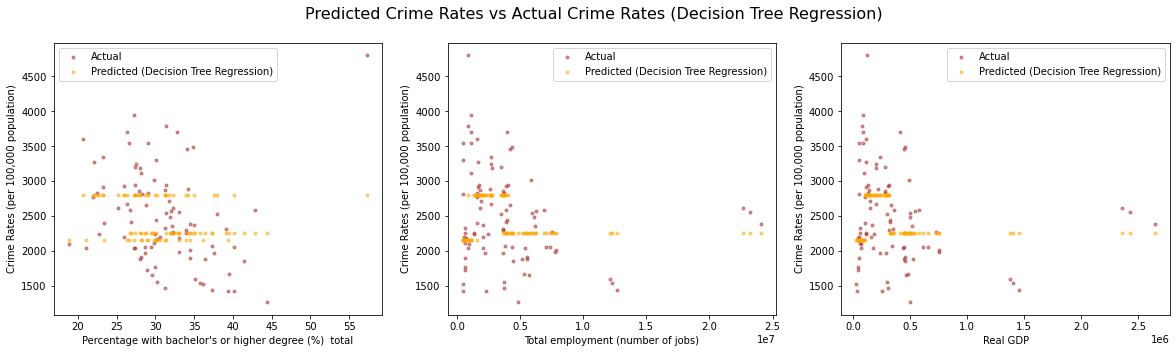

In [129]:
# Create subplots for each independent variable
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot each independent variable vs predited crime rates
for i, col in enumerate(X.columns):
    axs[i].scatter(X_test[col], y_test, marker='.', alpha = 0.5, label = 'Actual', color = 'brown')
    axs[i].scatter(X_test[col], y_predict_test, marker='.', alpha = 0.5, label = 'Predicted (Decision Tree Regression)',
                color = 'orange')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Crime Rates (per 100,000 population)")
    axs[i].legend()

# Add a title to the entire graphs
plt.suptitle('Predicted Crime Rates vs Actual Crime Rates (Decision Tree Regression)', fontsize=16)

# Display the graphs
plt.show()